# Apple Mobility Data


The Apple Mobility data used for this project is Time Series Data.
Time series data is a collection of data points that are assembled over periods in time and ordered chronologically. The time interval at which the data is collected is often referred to as the time series frequency. 

In [1]:
# Dependencies and Setup
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib.request


### Retrieving Apple Mobility Data 

In [2]:
with urllib.request.urlopen('https://covid19-static.cdn-apple.com/covid19-mobility-data/current/v3/index.json') as url:
    json_data = json.loads(url.read().decode())
link = 'https://covid19-static.cdn-apple.com' + json_data['basePath'] + json_data['regions']['en-us']['csvPath']
link

'https://covid19-static.cdn-apple.com/covid19-mobility-data/2014HotfixDev16/v3/en-us/applemobilitytrends-2020-08-15.csv'

### Retrieving the Apple Mobility Trends as .CSV

In [3]:
data_dir = 'Data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

path = os.path.join(data_dir, 'applemobilitytrends.csv')
urllib.request.urlretrieve(link, path)

('Data/applemobilitytrends.csv', <http.client.HTTPMessage at 0x7fe6334f59d0>)

In [4]:
df = pd.read_csv(path)
df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,187.74,203.09,218.60,234.00,230.14,215.44,216.40,232.93,248.51,267.54
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,144.52,150.49,151.17,140.72,163.50,166.27,168.27,161.58,165.29,181.54
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,57.83,66.13,63.37,36.89,55.64,57.49,59.57,60.74,71.67,71.08
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,43.61,48.15,48.86,27.78,43.74,45.29,46.27,47.79,55.35,52.62
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,92.37,90.20,73.91,78.69,82.83,85.36,89.13,95.89,93.84,79.57


### Filter the data so that only the US is in the DataFrame

In [5]:
df_us = df[df['country'] == 'United States']
df_us.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15
158,city,Akron,driving,NaN,Ohio,United States,100.0,103.06,107.50,106.14,...,159.12,177.50,168.17,133.00,150.64,154.30,156.01,161.10,178.70,165.92
159,city,Akron,transit,NaN,Ohio,United States,100.0,106.69,103.75,100.22,...,50.66,55.07,49.71,40.74,58.09,61.32,52.43,57.50,54.78,50.15
160,city,Akron,walking,NaN,Ohio,United States,100.0,97.23,79.05,74.77,...,127.06,142.07,129.24,93.44,118.53,122.11,123.79,129.98,145.24,129.94
161,city,Albany,driving,NaN,New York,United States,100.0,102.35,107.35,105.54,...,147.56,154.22,143.79,116.19,135.01,137.04,141.15,147.66,158.41,143.16
162,city,Albany,transit,NaN,New York,United States,100.0,100.14,105.95,107.76,...,86.76,86.99,86.02,75.34,87.09,88.62,85.51,90.76,92.99,82.68


### Cleaning Data

In [6]:
# Check the df for NaN # Interesting to note the the following dates retrieved no data '2020-05-11', '2020-05-12'
df_us.columns[df_us.isna().any()].tolist()

['alternative_name', 'sub-region', '2020-05-11', '2020-05-12']

#### It was interesting to note here that when checking the df for NaN that the following dates retrieved no values '2020-05-11', '2020-05-12' - this was noted on the Apple site 

In [7]:
# Look at rows that have the NA value in the 'sub-region' column
df_us[df_us['sub-region'].isna()]

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15
924,city,Washington DC,driving,DC,NaN,United States,100.0,105.82,109.02,110.37,...,113.55,132.12,133.39,106.17,111.62,114.90,113.39,112.24,132.27,127.58
925,city,Washington DC,transit,DC,NaN,United States,100.0,100.78,103.92,105.02,...,37.48,40.36,37.72,32.93,38.64,38.74,38.30,36.74,40.29,37.32
926,city,Washington DC,walking,DC,NaN,United States,100.0,99.07,109.61,104.16,...,87.44,106.80,119.12,88.44,87.05,86.87,85.17,84.77,106.98,107.30
945,sub-region,Alabama,driving,NaN,NaN,United States,100.0,102.90,103.51,109.71,...,169.90,195.32,196.83,145.43,156.83,155.36,158.80,168.08,194.23,195.73
947,sub-region,Alaska,driving,NaN,NaN,United States,100.0,104.69,104.64,110.10,...,204.90,237.60,224.50,182.73,198.87,195.38,200.80,206.68,236.04,228.42
963,sub-region,Arizona,driving,NaN,NaN,United States,100.0,104.06,106.90,111.45,...,110.66,127.13,124.89,98.44,105.44,108.16,108.50,111.98,132.81,127.69
964,sub-region,Arkansas,driving,NaN,NaN,United States,100.0,102.55,101.93,106.38,...,166.38,192.05,185.73,142.34,156.98,153.04,159.56,170.15,197.34,192.33
1004,sub-region,California,driving,NaN,NaN,United States,100.0,104.39,109.34,109.36,...,119.37,136.10,129.46,109.92,113.79,115.07,117.23,120.06,139.39,133.89
1068,sub-region,Colorado,driving,NaN,NaN,United States,100.0,103.46,105.66,109.36,...,159.73,180.48,169.02,143.69,150.71,152.06,158.33,162.99,182.60,171.41
1070,sub-region,Connecticut,driving,NaN,NaN,United States,100.0,105.22,108.31,109.35,...,163.88,177.20,178.98,147.50,156.45,160.96,157.71,160.24,180.41,178.77


In [8]:
# Rename - sub-regions to states - and fillna
df_us['sub-region'] = df_us['sub-region'].fillna(df_us['region'])
df_us = df_us.rename(columns={'sub-region': 'state'})
df_us.head()

/Users/LmH80/.conda/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,geo_type,region,transportation_type,alternative_name,state,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15
158,city,Akron,driving,NaN,Ohio,United States,100.0,103.06,107.50,106.14,...,159.12,177.50,168.17,133.00,150.64,154.30,156.01,161.10,178.70,165.92
159,city,Akron,transit,NaN,Ohio,United States,100.0,106.69,103.75,100.22,...,50.66,55.07,49.71,40.74,58.09,61.32,52.43,57.50,54.78,50.15
160,city,Akron,walking,NaN,Ohio,United States,100.0,97.23,79.05,74.77,...,127.06,142.07,129.24,93.44,118.53,122.11,123.79,129.98,145.24,129.94
161,city,Albany,driving,NaN,New York,United States,100.0,102.35,107.35,105.54,...,147.56,154.22,143.79,116.19,135.01,137.04,141.15,147.66,158.41,143.16
162,city,Albany,transit,NaN,New York,United States,100.0,100.14,105.95,107.76,...,86.76,86.99,86.02,75.34,87.09,88.62,85.51,90.76,92.99,82.68


In [9]:
# Remove unneccesary columns and columns with NA values
df_us = df_us.drop(columns=['geo_type', 'region', 'alternative_name', 'country', '2020-05-11', '2020-05-12'])
df_us.head()

,transportation_type,state,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15
158,driving,Ohio,100.0,103.06,107.50,106.14,123.62,105.99,82.68,94.99,...,159.12,177.50,168.17,133.00,150.64,154.30,156.01,161.10,178.70,165.92
159,transit,Ohio,100.0,106.69,103.75,100.22,89.04,74.85,56.99,75.59,...,50.66,55.07,49.71,40.74,58.09,61.32,52.43,57.50,54.78,50.15
160,walking,Ohio,100.0,97.23,79.05,74.77,89.55,88.39,49.30,56.29,...,127.06,142.07,129.24,93.44,118.53,122.11,123.79,129.98,145.24,129.94
161,driving,New York,100.0,102.35,107.35,105.54,128.97,88.28,82.76,102.46,...,147.56,154.22,143.79,116.19,135.01,137.04,141.15,147.66,158.41,143.16
162,transit,New York,100.0,100.14,105.95,107.76,101.39,85.79,82.86,126.71,...,86.76,86.99,86.02,75.34,87.09,88.62,85.51,90.76,92.99,82.68


### Grouping and Plotting Time series Data

In [10]:
# Group the data by transportation type
df_transport_type = df_us.groupby(['transportation_type']).mean()
df_transport_type

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15
transportation_type,,,,,,,,,,,,,,,,,,,,,
driving,100.0,102.135494,102.672297,108.623441,128.496399,118.153765,97.960364,111.333095,102.359175,100.009570,...,192.458124,224.410080,228.112603,191.271126,179.542647,178.179490,181.666634,191.855091,224.796634,225.655494
transit,100.0,100.371505,100.016989,97.896774,103.990000,90.527527,76.676882,93.474624,104.072581,103.195054,...,61.033978,64.307957,60.462258,52.383333,61.895161,62.398817,62.967527,63.061075,66.075806,61.864194
walking,100.0,103.419375,105.259821,104.463214,127.606161,137.720268,97.588125,99.073929,101.546875,102.238482,...,151.116071,174.562946,175.958929,130.183750,143.338304,147.595089,151.537946,156.825536,182.030446,181.932054


In [11]:
# Use the tranpose function to transpose the data so that dates become rows
df_transport_type_t = df_transport_type.transpose()
df_transport_type_t

transportation_type,driving,transit,walking
2020-01-13,100.000000,100.000000,100.000000
2020-01-14,102.135494,100.371505,103.419375
2020-01-15,102.672297,100.016989,105.259821
2020-01-16,108.623441,97.896774,104.463214
2020-01-17,128.496399,103.990000,127.606161
...,...,...,...
2020-08-11,178.179490,62.398817,147.595089
2020-08-12,181.666634,62.967527,151.537946
2020-08-13,191.855091,63.061075,156.825536
2020-08-14,224.796634,66.075806,182.030446


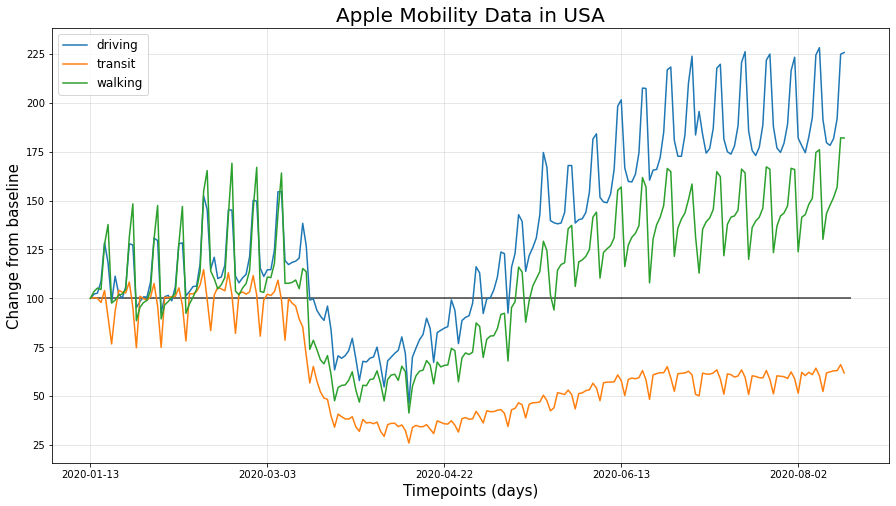

In [12]:
# Plot the transportation type data for the US ## Observable change in mobility March/April
df_transport_type_t.plot.line(figsize=(15, 8))
plt.title("Apple Mobility Data in USA", size = 20)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(100,0,215,alpha = 0.75)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig('Mobility Trends in USA.png')

#### It is interesting to note the impact of COVID19 on mobility and that as the stay at home orders started to lift across the US - the use of transit did not recover whereas walking and driving there was a steady increase.

In [13]:
transport = df_transport_type_t.reset_index()

In [14]:
transport["index"] = (transport["index"].astype("datetime64")).dt.strftime("%m-%d")
transport.head()

transportation_type,index,driving,transit,walking
0,01-13,100.000000,100.000000,100.000000
1,01-14,102.135494,100.371505,103.419375
2,01-15,102.672297,100.016989,105.259821
3,01-16,108.623441,97.896774,104.463214
4,01-17,128.496399,103.990000,127.606161


In [15]:
# Filtering US Transportation Type data by specified date range
start_date = "04-30"
end_date = "05-30"
mask = (transport['index'] > start_date) & (transport['index'] <= end_date)
may_df = transport.loc[mask]
may_df = may_df.reset_index(drop = True)
may_df.head()

transportation_type,index,driving,transit,walking
0,05-01,116.137596,42.258495,87.434554
1,05-02,112.945543,39.538280,85.633661
2,05-03,92.257880,36.312151,69.770179
3,05-04,99.723246,42.531613,79.051696
4,05-05,100.227140,42.047957,80.733036


#### Filtering the data by month to further analyse any significant changes - no significant changes to note in comparison to the first graph.

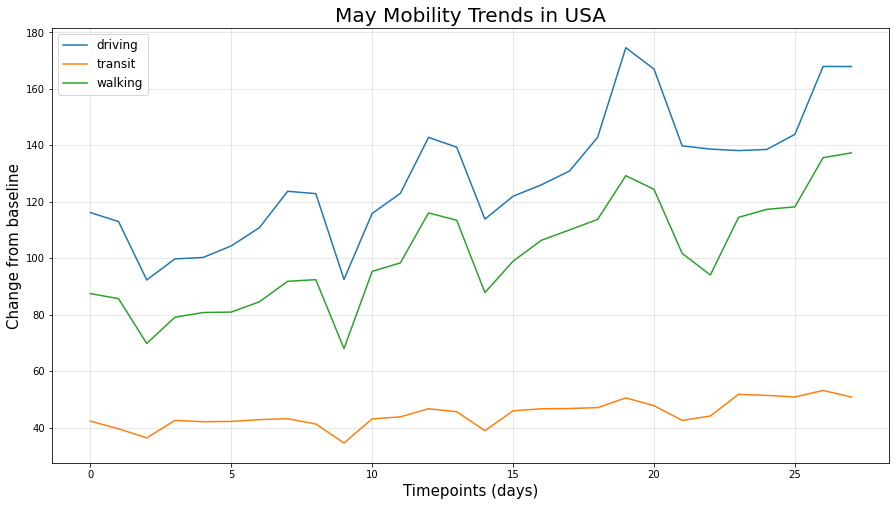

In [16]:
# Plot May mobility data for the US
may_df.plot.line(figsize=(15, 8))
plt.title('May Mobility Trends in USA', size = 20)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(100,0,0,alpha = 0.75)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig('May Mobility Trends in USA.png')

### 10 day Data

In [17]:
# Filtering US Transportation Type data 10 day range
start_date = "05-07"
end_date = "05-17"
mask = (transport['index'] > start_date) & (transport['index'] <= end_date)
week_may_df = transport.loc[mask]
week_may_df = week_may_df.reset_index(drop = True)
week_may_df.head()

transportation_type,index,driving,transit,walking
0,05-08,123.675353,43.124624,91.787679
1,05-09,122.836155,41.228065,92.363929
2,05-10,92.461650,34.499785,67.945000
3,05-13,115.834390,43.058387,95.300268
4,05-14,122.937073,43.767957,98.318125


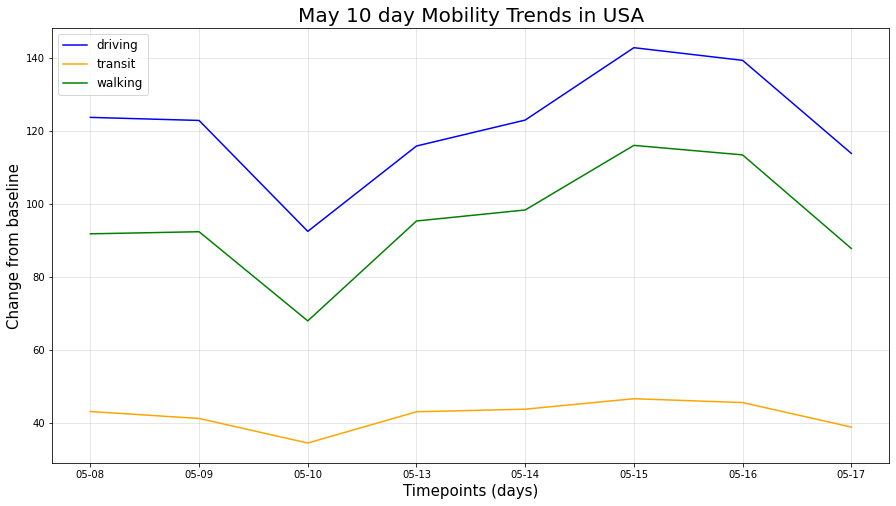

In [18]:
# Plot 10 Day mobility data for the US
plt.figure(figsize=(15,8))
plt.plot(week_may_df["index"], week_may_df['driving'], label = 'driving', color="Blue")
plt.plot(week_may_df["index"], week_may_df['transit'], label = "transit", color="Orange")
plt.plot(week_may_df["index"], week_may_df['walking'], label = "walking", color="Green")

plt.title('May 10 day Mobility Trends in USA', size = 20)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(100,0,0,alpha = 0.75)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig('May 10 day Mobility Trends in USA.png')

## Analyzing Data by State

In [19]:
# Retrieve and check df
df_us.head()

,transportation_type,state,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15
158,driving,Ohio,100.0,103.06,107.50,106.14,123.62,105.99,82.68,94.99,...,159.12,177.50,168.17,133.00,150.64,154.30,156.01,161.10,178.70,165.92
159,transit,Ohio,100.0,106.69,103.75,100.22,89.04,74.85,56.99,75.59,...,50.66,55.07,49.71,40.74,58.09,61.32,52.43,57.50,54.78,50.15
160,walking,Ohio,100.0,97.23,79.05,74.77,89.55,88.39,49.30,56.29,...,127.06,142.07,129.24,93.44,118.53,122.11,123.79,129.98,145.24,129.94
161,driving,New York,100.0,102.35,107.35,105.54,128.97,88.28,82.76,102.46,...,147.56,154.22,143.79,116.19,135.01,137.04,141.15,147.66,158.41,143.16
162,transit,New York,100.0,100.14,105.95,107.76,101.39,85.79,82.86,126.71,...,86.76,86.99,86.02,75.34,87.09,88.62,85.51,90.76,92.99,82.68


In [20]:
# Group the data by state
df_states = df_us.groupby(['state']).mean()
df_states.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15
state,,,,,,,,,,,,,,,,,,,,,
Alabama,100.0,105.967797,103.780339,112.086610,145.736441,124.995424,99.319831,118.000000,103.174068,102.429492,...,182.614576,214.236441,232.391864,173.624915,168.182712,163.732034,166.298475,177.411695,208.610339,215.645424
Alaska,100.0,102.530000,101.591250,107.240000,127.776250,125.135000,92.598750,97.748750,105.341250,103.876250,...,218.167500,251.133750,249.111250,198.238750,214.243750,213.726250,214.005000,218.933750,254.427500,253.605000
Arizona,100.0,103.809524,110.464286,114.076190,140.415238,141.222381,111.749048,117.945238,105.926190,106.312857,...,138.167619,165.410000,174.336190,161.747619,131.998095,127.100952,130.061905,138.260476,170.944286,176.150000
Arkansas,100.0,102.638750,99.430000,107.272917,131.544583,122.479583,91.039792,105.825625,99.928750,89.248958,...,173.274583,207.387917,206.845833,164.235417,160.396458,154.518958,157.960417,172.715000,207.130208,204.534167
California,100.0,101.095841,104.238673,103.737522,127.894602,127.674248,100.959469,108.687434,103.381593,105.125221,...,145.314248,166.383363,165.320973,145.662743,139.546637,135.860354,139.199027,144.164336,167.979735,169.232655


In [21]:
# Use the tranpose function to transpose the data so that dates become rows
df_states_t = df_states.T
df_states_t

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
2020-01-13,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-14,105.967797,102.53000,103.809524,102.638750,101.095841,99.558636,105.275000,98.3750,101.359367,102.545495,...,101.498235,103.921429,99.030769,94.573333,99.978544,96.727632,101.890000,101.671852,103.552414,108.232308
2020-01-15,103.780339,101.59125,110.464286,99.430000,104.238673,102.054773,108.423889,101.4775,103.492025,103.928739,...,101.453088,111.936190,101.640769,101.420000,104.677184,98.835263,107.516667,103.709259,98.788793,107.087692
2020-01-16,112.086610,107.24000,114.076190,107.272917,103.737522,109.690682,108.327778,103.4225,109.639241,112.192793,...,105.519510,124.141905,97.441538,99.996667,108.279612,107.755000,106.516667,106.623333,109.694828,109.066154
2020-01-17,145.736441,127.77625,140.415238,131.544583,127.894602,146.586364,125.219444,120.5125,132.241139,140.301982,...,130.911814,158.166190,156.904615,106.556667,131.565243,136.519737,119.800000,127.327407,125.399655,133.785385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-11,163.732034,213.72625,127.100952,154.518958,135.860354,234.122727,149.688333,186.5000,119.505063,163.875586,...,139.554657,251.605238,175.596154,117.573333,161.310874,199.747105,80.170000,180.727778,206.177241,360.242308
2020-08-12,166.298475,214.00500,130.061905,157.960417,139.199027,254.397500,145.465000,181.5925,122.506329,165.292342,...,141.924657,263.531905,180.201538,109.183333,160.949320,203.667632,78.953333,182.590370,211.906207,373.781538
2020-08-13,177.411695,218.93375,138.260476,172.715000,144.164336,260.710000,148.396667,187.2125,129.199747,173.507568,...,150.350000,276.794762,185.968462,118.066667,167.609612,215.517895,77.916667,195.762963,230.588276,397.038462
2020-08-14,208.610339,254.42750,170.944286,207.130208,167.979735,294.860909,168.296667,214.9200,150.765823,201.013514,...,181.715049,327.023810,219.155385,137.753333,194.836796,255.292895,93.180000,223.765556,279.037586,438.674615


### Did all states have reduced mobility during quarantine and did each state recover the same?

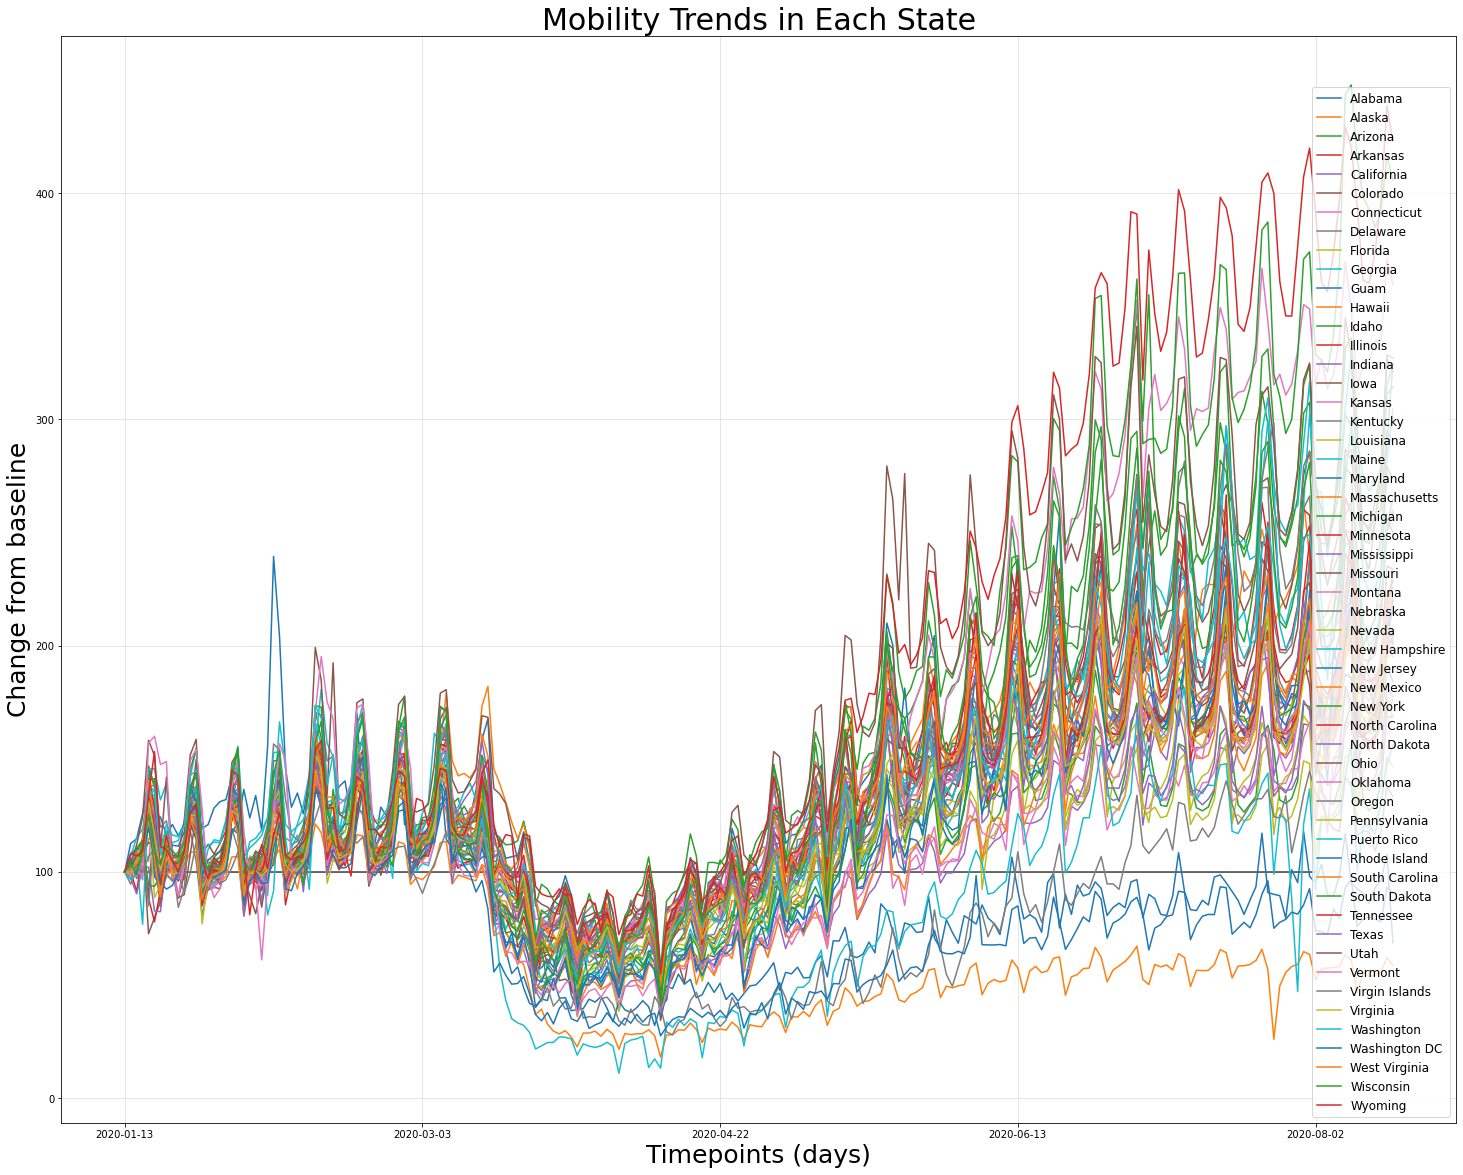

In [22]:
# Plot the mobility data for each state ## Good luck deciphering the plot - need to filter
df_states_t.plot.line(figsize=(25, 20))
plt.title('Mobility Trends in Each State',size = 30)
plt.xlabel("Timepoints (days)", size = 25)
plt.ylabel("Change from baseline", size = 25)
plt.hlines(100,0,200,alpha = 0.75)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.legend(loc = "lower right", fontsize = "large")
plt.savefig('Mobility Trends in Each State.png')

### Analyzing Data of the Top 5 States

In [23]:
# Add a column 'total' to the df_states to identify the top 5 
df_states['total'] = df_states.sum(axis=1)
df_states.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,total
state,,,,,,,,,,,,,,,,,,,,,
Alabama,100.0,105.967797,103.780339,112.086610,145.736441,124.995424,99.319831,118.000000,103.174068,102.429492,...,214.236441,232.391864,173.624915,168.182712,163.732034,166.298475,177.411695,208.610339,215.645424,30250.589661
Alaska,100.0,102.530000,101.591250,107.240000,127.776250,125.135000,92.598750,97.748750,105.341250,103.876250,...,251.133750,249.111250,198.238750,214.243750,213.726250,214.005000,218.933750,254.427500,253.605000,30769.250000
Arizona,100.0,103.809524,110.464286,114.076190,140.415238,141.222381,111.749048,117.945238,105.926190,106.312857,...,165.410000,174.336190,161.747619,131.998095,127.100952,130.061905,138.260476,170.944286,176.150000,25616.438095
Arkansas,100.0,102.638750,99.430000,107.272917,131.544583,122.479583,91.039792,105.825625,99.928750,89.248958,...,207.387917,206.845833,164.235417,160.396458,154.518958,157.960417,172.715000,207.130208,204.534167,27891.530208
California,100.0,101.095841,104.238673,103.737522,127.894602,127.674248,100.959469,108.687434,103.381593,105.125221,...,166.383363,165.320973,145.662743,139.546637,135.860354,139.199027,144.164336,167.979735,169.232655,22851.636283


In [24]:
# Sort the values
df_states = df_states.sort_values(by = ['total'], ascending=False)
df_states.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,total
state,,,,,,,,,,,,,,,,,,,,,
Wyoming,100.0,108.232308,107.087692,109.066154,133.785385,153.134615,111.303846,109.819231,104.856923,100.063077,...,429.270000,420.307692,394.356923,361.289231,360.242308,373.781538,397.038462,438.674615,423.086923,42475.356923
South Dakota,100.0,105.769167,100.634167,113.694167,94.043333,93.595000,98.250000,111.292500,104.502500,103.984167,...,443.533333,447.742500,415.104167,398.596667,392.504167,384.766667,391.682500,416.537500,405.722500,39636.716667
Utah,100.0,103.921429,111.936190,124.141905,158.166190,151.376667,109.313333,141.839524,107.133333,107.212381,...,344.731905,327.946667,274.899048,254.725238,251.605238,263.531905,276.794762,327.023810,320.857619,38530.232381
Montana,100.0,97.240833,98.113333,104.521667,125.475833,128.324167,100.174167,105.037500,99.839167,98.579167,...,369.573333,348.662500,315.577500,322.850000,325.375833,334.517500,334.686667,371.300833,359.301667,37551.672500
Idaho,100.0,99.725714,108.985714,113.655238,146.830476,137.558571,91.963333,117.678095,106.085714,108.852857,...,302.035238,297.068571,270.415714,255.021905,250.419524,257.228571,270.605714,311.052857,314.273810,35597.006667


In [25]:
# Create a df for the top 5 states 
df_top_5_states = df_states.head(5)
df_top_5_states

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,total
state,,,,,,,,,,,,,,,,,,,,,
Wyoming,100.0,108.232308,107.087692,109.066154,133.785385,153.134615,111.303846,109.819231,104.856923,100.063077,...,429.270000,420.307692,394.356923,361.289231,360.242308,373.781538,397.038462,438.674615,423.086923,42475.356923
South Dakota,100.0,105.769167,100.634167,113.694167,94.043333,93.595000,98.250000,111.292500,104.502500,103.984167,...,443.533333,447.742500,415.104167,398.596667,392.504167,384.766667,391.682500,416.537500,405.722500,39636.716667
Utah,100.0,103.921429,111.936190,124.141905,158.166190,151.376667,109.313333,141.839524,107.133333,107.212381,...,344.731905,327.946667,274.899048,254.725238,251.605238,263.531905,276.794762,327.023810,320.857619,38530.232381
Montana,100.0,97.240833,98.113333,104.521667,125.475833,128.324167,100.174167,105.037500,99.839167,98.579167,...,369.573333,348.662500,315.577500,322.850000,325.375833,334.517500,334.686667,371.300833,359.301667,37551.672500
Idaho,100.0,99.725714,108.985714,113.655238,146.830476,137.558571,91.963333,117.678095,106.085714,108.852857,...,302.035238,297.068571,270.415714,255.021905,250.419524,257.228571,270.605714,311.052857,314.273810,35597.006667


In [26]:
# Remove the total column to not interfere with the data represented on the plot
df_top_5_states = df_top_5_states.drop(columns=['total'])

In [27]:
# Use the tranpose function to transpose the data so that dates become rows
df_top_5_states_t = df_top_5_states.T

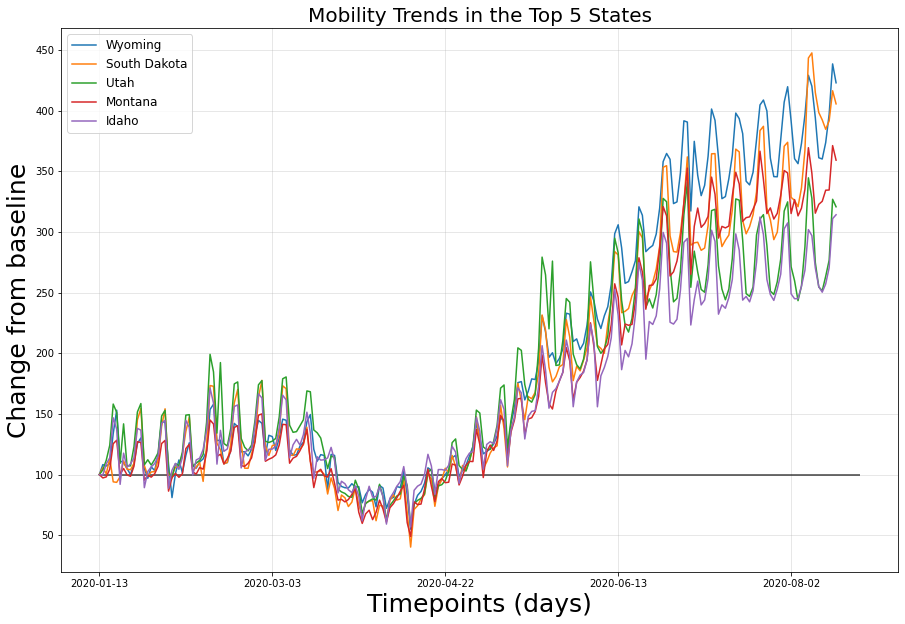

In [28]:
# Plot the mobility data for the top 5 states
df_top_5_states_t.plot.line(figsize=(15, 10))
plt.title('Mobility Trends in the Top 5 States',size = 20)
plt.xlabel("Timepoints (days)", size = 25)
plt.ylabel("Change from baseline", size = 25)
plt.hlines(100,0,220,alpha = 0.75)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig('Mobility Trends in the Top 5 States.png')

### Analyzing Data of the lowest 5 States

In [29]:
# Sort the values
df_states = df_states.sort_values(by = ['total'])
df_states.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,total
state,,,,,,,,,,,,,,,,,,,,,
Hawaii,100.0,100.136364,104.547273,103.310000,114.726364,113.956364,96.987273,99.151818,100.122727,101.056364,...,63.501818,60.963636,46.357273,55.764545,53.720000,54.420909,56.045455,62.131818,58.560000,13573.186364
Washington DC,100.0,101.890000,107.516667,106.516667,119.800000,104.970000,95.393333,92.370000,94.006667,99.240000,...,93.093333,96.743333,75.846667,79.103333,80.170000,78.953333,77.916667,93.180000,90.733333,15943.043333
Virgin Islands,100.0,94.573333,101.420000,99.996667,106.556667,110.703333,99.393333,99.416667,95.890000,98.803333,...,142.023333,138.173333,115.980000,118.110000,117.573333,109.183333,118.066667,137.753333,133.170000,18496.140000
Guam,100.0,112.520000,114.650000,125.740000,140.890000,125.460000,124.230000,116.140000,120.940000,115.990000,...,116.880000,95.110000,92.530000,90.520000,86.060000,92.910000,96.380000,107.810000,68.680000,19007.760000
Puerto Rico,100.0,107.111111,115.128889,118.889444,133.567778,136.340000,109.313889,102.363889,112.953889,113.791667,...,142.425000,156.195556,100.333889,119.885000,121.042778,116.575556,130.602222,147.309444,156.274444,20647.736667


In [30]:
# Create a df for the lowest 5 states # Observation - 
df_low_5_states = df_states.head(5)
df_low_5_states

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,total
state,,,,,,,,,,,,,,,,,,,,,
Hawaii,100.0,100.136364,104.547273,103.310000,114.726364,113.956364,96.987273,99.151818,100.122727,101.056364,...,63.501818,60.963636,46.357273,55.764545,53.720000,54.420909,56.045455,62.131818,58.560000,13573.186364
Washington DC,100.0,101.890000,107.516667,106.516667,119.800000,104.970000,95.393333,92.370000,94.006667,99.240000,...,93.093333,96.743333,75.846667,79.103333,80.170000,78.953333,77.916667,93.180000,90.733333,15943.043333
Virgin Islands,100.0,94.573333,101.420000,99.996667,106.556667,110.703333,99.393333,99.416667,95.890000,98.803333,...,142.023333,138.173333,115.980000,118.110000,117.573333,109.183333,118.066667,137.753333,133.170000,18496.140000
Guam,100.0,112.520000,114.650000,125.740000,140.890000,125.460000,124.230000,116.140000,120.940000,115.990000,...,116.880000,95.110000,92.530000,90.520000,86.060000,92.910000,96.380000,107.810000,68.680000,19007.760000
Puerto Rico,100.0,107.111111,115.128889,118.889444,133.567778,136.340000,109.313889,102.363889,112.953889,113.791667,...,142.425000,156.195556,100.333889,119.885000,121.042778,116.575556,130.602222,147.309444,156.274444,20647.736667


In [31]:
# Remove the total column to not interfere with the data represented on the plot
df_low_5_states = df_low_5_states.drop(columns=['total'])

In [32]:
# Use the tranpose function to transpose the data so that dates become rows
df_low_5_states_t = df_low_5_states.T

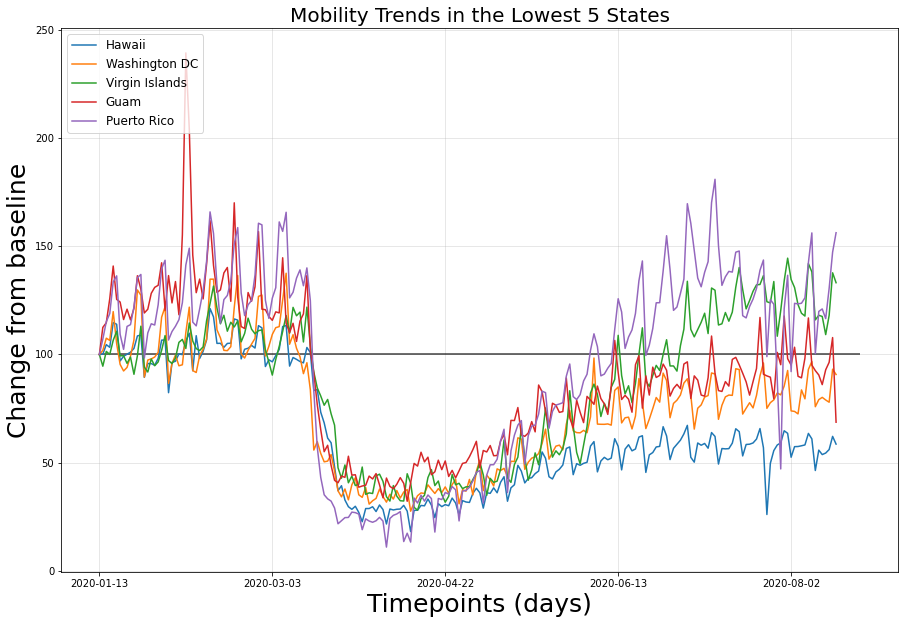

In [33]:
# Plot the mobility data for the top 5 states
df_low_5_states_t.plot.line(figsize=(15, 10))
plt.title('Mobility Trends in the Lowest 5 States',size = 20)
plt.xlabel("Timepoints (days)", size = 25)
plt.ylabel("Change from baseline", size = 25)
plt.hlines(100,0,220,alpha = 0.75)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig('Mobility Trends in the Lowest 5 States.png')

## Filtering the data for the month of May

#### Mobility Data for Top 5 States - Month of May

In [34]:
top_5 = df_top_5_states_t.reset_index()

In [35]:
top_5["index"] = (top_5["index"].astype("datetime64")).dt.strftime("%m-%d")
top_5.head()

state,index,Wyoming,South Dakota,Utah,Montana,Idaho
0,01-13,100.000000,100.000000,100.000000,100.000000,100.000000
1,01-14,108.232308,105.769167,103.921429,97.240833,99.725714
2,01-15,107.087692,100.634167,111.936190,98.113333,108.985714
3,01-16,109.066154,113.694167,124.141905,104.521667,113.655238
4,01-17,133.785385,94.043333,158.166190,125.475833,146.830476


In [36]:
# Filtering US Transportation Type data by specified date range
start_date = "05-01"
end_date = "05-30"
mask = (top_5['index'] > start_date) & (top_5['index'] <= end_date)
top_5_may_df = top_5.loc[mask]
top_5_may_df.head()

state,index,Wyoming,South Dakota,Utah,Montana,Idaho
110,05-02,130.527692,127.508333,150.764286,124.791667,135.875238
111,05-03,117.143846,104.907500,122.820476,97.584167,104.515238
112,05-04,118.999231,110.490833,120.651429,118.924167,124.882381
113,05-05,121.360000,117.807500,120.778571,124.373333,127.120476
114,05-06,125.280769,122.138333,127.512857,119.948333,125.398095


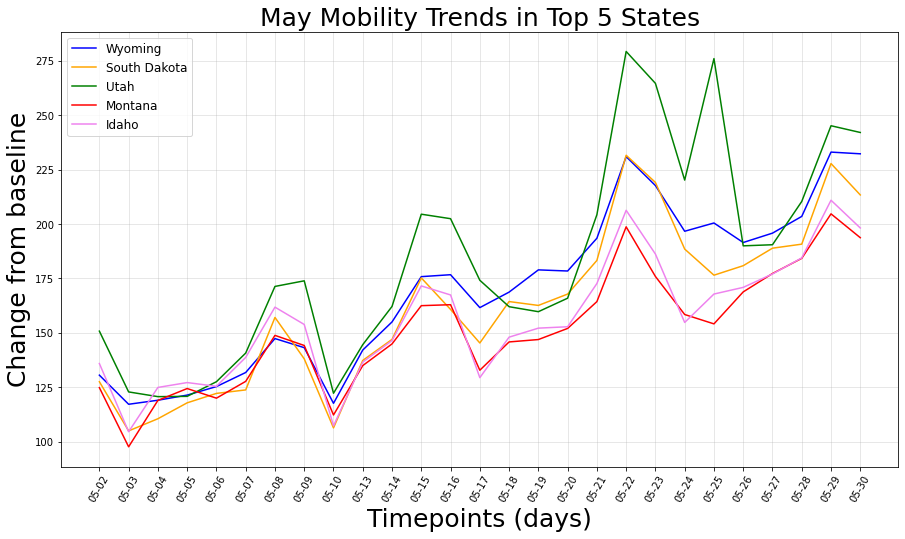

In [37]:
# Plot the mobility data for top 5 States
plt.figure(figsize=(15,8))
plt.plot(top_5_may_df["index"], top_5_may_df['Wyoming'], label = 'Wyoming', color="Blue")
plt.plot(top_5_may_df["index"], top_5_may_df['South Dakota'], label = "South Dakota", color="Orange")
plt.plot(top_5_may_df["index"], top_5_may_df['Utah'], label = "Utah", color="Green")
plt.plot(top_5_may_df["index"], top_5_may_df['Montana'], label = "Montana", color="Red")
plt.plot(top_5_may_df["index"], top_5_may_df['Idaho'],label = "Idaho", color="Violet")

plt.title('May Mobility Trends in Top 5 States',size = 25)
plt.xlabel("Timepoints (days)", size = 25)
plt.ylabel("Change from baseline", size = 25)
plt.xticks(rotation = 60)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("May Mobility Trends in Top 5 States.png", dpi = 100)
plt.show()

### Mobility Data for lowest 5 States - Month of May

In [38]:
low_5 = df_low_5_states_t.reset_index()

In [39]:
low_5["index"] = (low_5["index"].astype("datetime64")).dt.strftime("%m-%d")
low_5.head()

state,index,Hawaii,Washington DC,Virgin Islands,Guam,Puerto Rico
0,01-13,100.000000,100.000000,100.000000,100.00,100.000000
1,01-14,100.136364,101.890000,94.573333,112.52,107.111111
2,01-15,104.547273,107.516667,101.420000,114.65,115.128889
3,01-16,103.310000,106.516667,99.996667,125.74,118.889444
4,01-17,114.726364,119.800000,106.556667,140.89,133.567778


In [40]:
# Filtering US Transportation Type data by specified date range
start_date = "05-01"
end_date = "05-30"
mask = (low_5['index'] > start_date) & (low_5['index'] <= end_date)
low_5_may_df = low_5.loc[mask]
low_5_may_df.head()

state,index,Hawaii,Washington DC,Virgin Islands,Guam,Puerto Rico
110,05-02,36.049091,51.100000,50.156667,47.61,46.330000
111,05-03,28.962727,37.050000,44.303333,55.61,31.255000
112,05-04,36.087273,44.236667,34.890000,54.93,44.267222
113,05-05,35.786364,42.116667,42.723333,57.90,48.992778
114,05-06,38.330909,39.203333,40.890000,53.19,49.039444


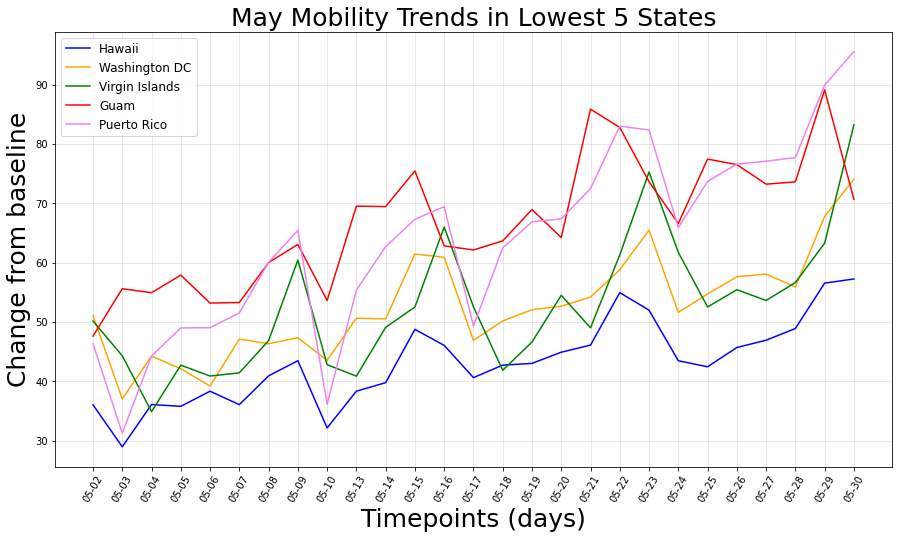

In [41]:
# Plot the mobility data for lowest 5 States
plt.figure(figsize=(15,8))
plt.plot(low_5_may_df["index"], low_5_may_df['Hawaii'], label = 'Hawaii', color="Blue")
plt.plot(low_5_may_df["index"], low_5_may_df['Washington DC'], label = "Washington DC", color="Orange")
plt.plot(low_5_may_df["index"], low_5_may_df['Virgin Islands'], label = "Virgin Islands", color="Green")
plt.plot(low_5_may_df["index"], low_5_may_df['Guam'], label = "Guam", color="Red")
plt.plot(low_5_may_df["index"], low_5_may_df['Puerto Rico'],label = "Puerto Rico", color="Violet")

plt.title('May Mobility Trends in Lowest 5 States',size = 25)
plt.xlabel("Timepoints (days)", size = 25)
plt.ylabel("Change from baseline", size = 25)
plt.xticks(rotation = 60)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("May Mobility Trends in Lowest 5 States.png", dpi = 100)
plt.show()